## Exercise 05: Validation & Regularization



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline
a = np.loadtxt('TrainingRidge.csv',skiprows=1,delimiter=',')
b = np.loadtxt('ValidationRidge.csv',skiprows=1,delimiter=',')

# Group menber: Zhanwang Chen 389930
# Changbin Lu       365571
# Hsiwei Kao


In [15]:
np.unique(a[:,2])

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  40.,  41.,  42.,  44.,  46.,  53.])

In [2]:
def sphered(m):
    m_centered = m-m.mean(0)
    m_cov= m[:,0:1]*np.transpose(m[:,0:1])
    m_eigvalue,m_eigvector =np.linalg.eig(m_cov)
    m_approx = np.transpose(m_eigvector)*m[:,0:1]
    
    return m_approx
def plot(m1,m2):
    fig, ax = plt.subplots(1, 2,figsize=(13, 4))
    ax[0].scatter(m1.T[0], m1.T[1],0.5)
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    
    ax[1].scatter(m2.T[0], m2.T[1],0.5)
    ax[1].set_xlabel('x1')
    ax[1].set_ylabel('x2')

# (a)

C:\Users\27630\Anaconda3\lib\site-packages\numpy\core\numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


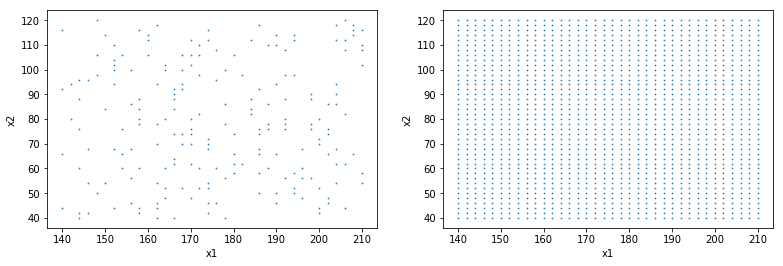

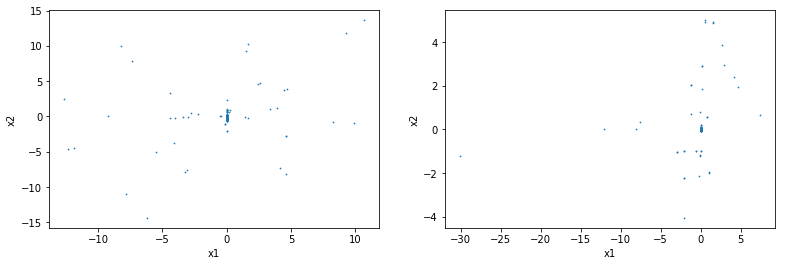

In [4]:
plot(a,b)
a1 = sphered(a)
b1 = sphered(b)
plot(a1,b1)


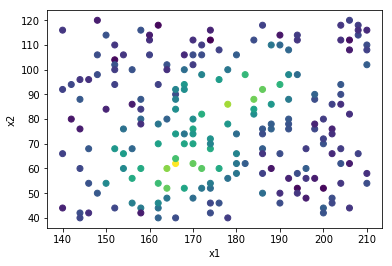

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import mpl_toolkits.axes_grid1 as plt_ax
import pandas as pd
%matplotlib inline

TrainingRidge = pd.read_csv('TrainingRidge.csv')
ValidationRidge = pd.read_csv('ValidationRidge.csv')

train_x = TrainingRidge[['x1', 'x2']]
train_y = TrainingRidge['obs']

val_x = ValidationRidge[['x1', 'x2']]
val_y = ValidationRidge['dens']

plt.scatter(train_x['x1'], train_x['x2'], c=train_y)
plt.xlabel('x1')
plt.ylabel('x2')



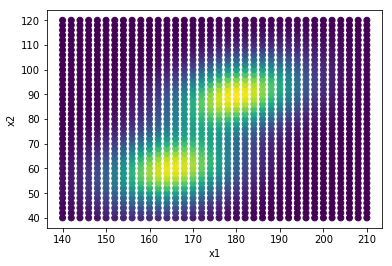

In [4]:
plt.scatter(val_x['x1'], val_x['x2'], c=val_y)
plt.xlabel('x1')
plt.ylabel('x2')

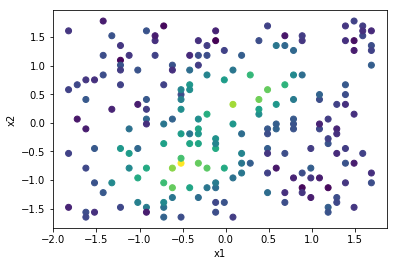

In [5]:
#TrainingRidge = np.loadtxt('TrainingRidge.csv',skiprows=1,delimiter=',')
#ValidationRidge = np.loadtxt('ValidationRidge.csv',skiprows=1,delimiter=',')


TrainingRidge = pd.read_csv('TrainingRidge.csv')
ValidationRidge = pd.read_csv('ValidationRidge.csv')

train_x = TrainingRidge[['x1', 'x2']]
train_y = TrainingRidge['obs']

val_x = ValidationRidge[['x1', 'x2']]
val_y = ValidationRidge['dens']

mean = train_x.mean()
std = train_x.std()
train_x = (train_x - mean) / std
val_x = (val_x - mean) / std

plt.scatter(train_x['x1'], train_x['x2'], c=train_y)
plt.xlabel('x1')
plt.ylabel('x2')

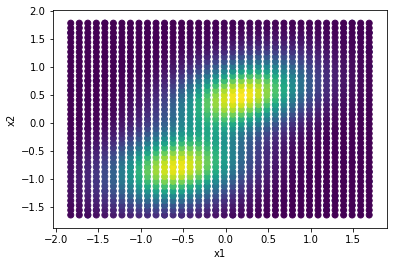

In [6]:
plt.scatter(train_x['x1'], train_x['x2'], c=train_y)
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(val_x['x1'], val_x['x2'], c=val_y)
plt.xlabel('x1')
plt.ylabel('x2')

# (b)

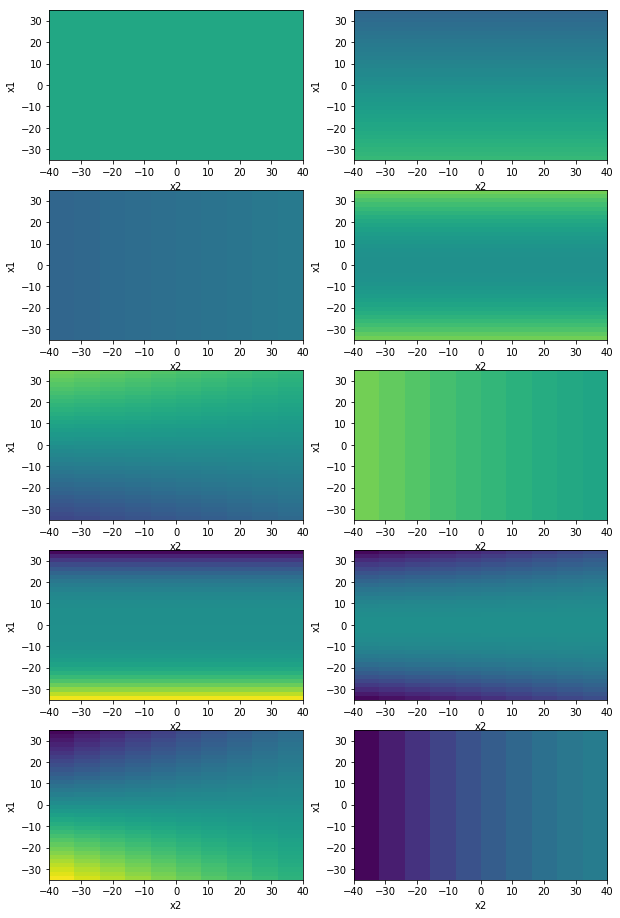

In [10]:

# (b)

def plot_heatmaps(monomials):
    fig, axes = plt.subplots(5, 2, figsize=(10, 16))
    for row, axesRow in enumerate(axes):
        for col, ax in enumerate(axesRow):
            i = row * 2 + col
            max_ = 5 
            img = ax.imshow(monomials[i, :10].T, extent=[-40, 40, -35, 35], aspect='auto', vmin=-max_, vmax=max_)
            ax.set_ylabel('x1')
            ax.set_xlabel('x2')
    
def matrix(ridge):
    def monomials(x1, x2, max_degree):
        for degree in range(max_degree + 1):
            for i in range(degree + 1):
                yield x1**(degree - i) * x2**i
    matrix = np.array([[x1, x2, monomials(x1, x2, 9), y] for x1, x2, y in ridge])
    matrix = np.array([list(x) for x in matrix[:, 2]])
    return matrix
def whiten_data(ridge):
    ridge = np.copy(ridge)
    data = ridge[:, :2]
    data -= data.mean(axis=0)
    C = data.T.dot(data) / data.shape[0]
    w, V = np.linalg.eigh(C)
    L = np.diag(np.nan_to_num(1 / np.sqrt(w)))
    data = V.T.dot(data.T).T
    data = L.dot(V.T).dot(data.T).T
    ridge[:, :2] = data
    return ridge
TrainingRidge = np.loadtxt('TrainingRidge.csv',skiprows=1,delimiter=',')
ValidationRidge = np.loadtxt('ValidationRidge.csv',skiprows=1,delimiter=',')
training_whiten = whiten_data(TrainingRidge)
validation_whiten = whiten_data(ValidationRidge)
valmonomial = matrix(validation_whiten)
tramonomial = matrix(training_whiten).T
plot_heatmaps(valmonomial.T.reshape(55, 41, 36))

In [5]:

def extend(x):
    m = np.empty((0,10))
    for i in x:
        m = np.append(m,[(i[0]**0)*(i[1]**0)
                 ,(i[0]**0)*(i[1]**1),(i[0]**1)*(i[1]**0)
                 ,(i[0]**0)*(i[1]**2),(i[0]**1)*(i[1]**1),(i[0]**2)*(i[1]**0)
                 ,(i[0]**0)*(i[1]**3),(i[0]**1)*(i[1]**2),(i[0]**2)*(i[1]**1),(i[0]**3)*(i[1]**0)])

    m = m.reshape(10,x.shape[0])
    l = np.dot(np.linalg.inv(np.dot(m,np.transpose(m))),m)
    y = x[:,2].reshape(x.shape[0],1)
    return np.dot(np.transpose(np.dot(l,y)),m)
y = extend(b1)

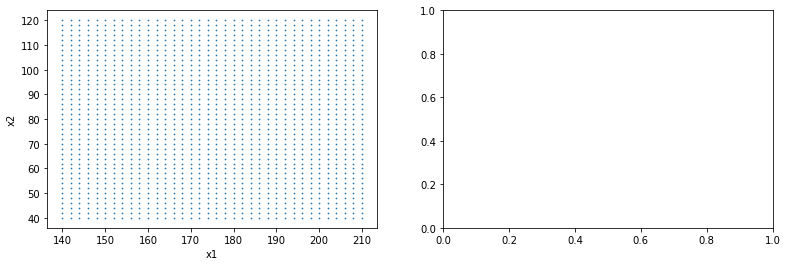

In [7]:
fig, ax = plt.subplots(1, 2,figsize=(13, 4))
ax[0].scatter(b.T[0], b.T[1],0.5)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
 

# (c)

In [94]:
es = []
for i in range(10):
    for j in range(i+1):
        k = i-j
        es.append((j,k))
def extend_regular(x,lamb):
    m = np.empty((0,55))
    for i in x:
        m = np.append(m,[(i[0]**e[0])*(i[1]**e[1]) for e in es])

    m = m.reshape(55,x.shape[0])
    t = np.dot(m,np.transpose(m))+ lamb*np.identity(55)
    l = np.dot(np.linalg.inv(t),m)
    y = x[:,2].reshape(x.shape[0],1)
    return np.transpose(np.dot(l,y)),m

In [96]:
from sklearn.model_selection import KFold
lambdaz = [10**z for z in np.arange(-4.0,4.0,0.1)]
results = []
costs = []
kf = KFold(n_splits=10)
for train_index, test_index in kf.split(a):
    train,test = a[train_index],a[test_index]
    for l in lambdaz:
        
        w_train,x_train = extend_regular(train,l)
        w_test,x_test = extend_regular(test,l)
#         print(w_train.shape,x_test.shape)
        y = w_train.dot(x_test)
#         print(w_train)
        error = (y-test[:,2])**2
        results.append(y.mean())
        costs.append(error.mean())

In [83]:
y

array([[-9.00371301]])